# Tutorial 2 - Using your model
    

In this notebook, we show how to use the models discussed in Tutorial 1. Note that we only discuss the necessary inputs here since they are what will be needed in most cases. For full documentation of the following functions and their uses, see the "precoded_functions_usage" notebook.

If you have not done so already, look at Tutorial 1 to learn how to use the model you are interested in. Once you have done this, import PyBEAM's precoded sub-module.


In [14]:
# import PyBEAM's precoded sub-module
import pybeam.precoded as pbp


We will for this example use the simpleDDM model discussed in Tutorial 1a.


In [15]:
# call simpleDDM model
model = pbp.simpleDDM()


As demonstrated in Tutorial 1, we can check which parameters our model uses. We should find that it uses the following four parameters:

    'tnd': non-decision time
      'w': relative start point
     'mu': drift rate
      'b': decision threshold location (upper is at b, lower is at -b; separation is 2b)
      

In [16]:
# check which parameters your model uses
model.parameters()


['tnd', 'w', 'mu', 'b']

Now that we have defined our model and checked which parameters it uses, we can now use PyBEAM's main functions.

The first is simulate, a function which simulates data from your model. This requires three inputs: 

     N_sims (int): Sets number of simulated data points.
    model (class): Model class (in this case it will be the simpleDDM).
       phi (dict): Contains model parameters. Keys are model parameters, values of keys set the respective
                   parameter values. In this case, keys are 't_nd', 'w', 'mu', and 'b'.

Two optional inputs are also available for this funtion. These are:

    seed (int): sets the random number generator seed.
    dt (float): sets the simulation time step (default dt = 0.0001).


This function outputs the following:

    (dict) containing two keys, 'rt_upper' and 'rt_lower'. Correspond to simulated reaction time data for the
    upper and lower decision thresholds, respectively.


In [17]:
# parameters for model
phi = {'tnd' : 0.25,  # non-decision time
         'w' : 0.5,   # relative start point
        'mu' : 1.0 ,  # drift rate
         'b' : 0.75}  # decision threshold location

# simulate data from the model
rt = pbp.simulate(N_sims = 100,   # number of data points to simulate
                   model = model, # dictionary containing model information
                     phi = phi)   # parameters used to simulate data

rt


{'rt_upper': array([0.7097, 0.4778, 1.0399, 0.3096, 0.7601, 0.7693, 1.6121, 0.4676,
        0.5687, 2.4686, 0.5297, 0.5353, 0.633 , 1.1397, 0.698 , 0.348 ,
        0.7759, 0.3202, 0.8028, 0.4524, 1.9639, 0.6962, 0.8158, 1.3256,
        0.4096, 0.5394, 0.7853, 0.5525, 0.4415, 0.6692, 0.5926, 0.388 ,
        0.4122, 0.4737, 0.6728, 0.6674, 1.0166, 0.7174, 0.5619, 0.52  ,
        1.6464, 0.3696, 0.5612, 0.6499, 2.1941, 0.6691, 0.7259, 0.3199,
        1.1316, 0.7718, 0.4712, 0.7566, 0.4771, 0.6086, 0.4175, 0.7722,
        0.9691, 0.4412, 0.445 , 1.2366, 2.0935, 0.4505, 0.4573, 0.4539,
        0.7961, 1.0127, 0.3676, 0.9412, 0.5526, 2.4468, 0.8563, 0.3717,
        0.5798, 0.6465, 0.5615, 0.4088, 0.4271]),
 'rt_lower': array([0.866 , 0.4524, 0.9958, 0.9167, 0.3194, 0.4825, 0.3691, 0.5725,
        0.3657, 0.9378, 0.3978, 0.3728, 0.7386, 0.7126, 1.4855, 1.6245,
        1.0619, 0.5989, 0.4421, 0.505 , 1.0421, 0.9785, 0.8868])}

The next function we introduce is likelihood. likelihood takes the input model and calculates its likelihood function (i.e. the model's predicted rt distribution). It has three required inputs: 

    model (class): Model class (in this case it will be the simpleDDM).
    phi (dict): Contains model parameters. Keys are model parameters, values of keys set the respective
                parameter values. In this case, keys are 't_nd', 'w', 'mu', and 'b'.
    rt_max (float): Sets max time to solve likleihood function to.
    
likelihood also has several optional inputs. In general, these should not need to be touched, but they are available in case your model has a difficult to calculate likelihood:

    N_tnd (int): Number of integration points for non-decision time distribution. Defualts to 50.
    N_mu (int): Number of integration points for drift rate distribution. Defaults to 10.
    x_res (str,int): Spatial resolution of solver. Sets number of spatial mesh points in finite difference
                     grid. Four pre-set options are available: 'default' (101 mesh points), 'high' (151 mesh
                     points), 'very_high' (251 mesh points), and 'max' (501 mesh points). Can also be set to an
                     integer value between 101 and 501. Default should be used for nearly all cases.
    t_res (str): Temporal resolution of sovler. Four options are available: 'default', 'high', 'very_high',
                  and 'max'. Default should be used for nearly all cases.
                  
Other optional inputs are available for this function, but they are only necessary in niche applications and are thus discussed in the "precoded_functions_usage" notebook.

This function outputs the following:

    (dict) containing three keys: 'time', 'rt_upper' and 'rt_lower'. 'time' is the time for each point
    in the distribution, while 'rt_upper' and 'rt_lower' are the proabiblity for upper and lower threshold
    crossings, respectively, for each value in the 'time' array.


In [18]:
lh = pbp.likelihood(model = model,
                      phi = phi,
                   rt_max = 3.0)

lh


{'time': array([0.       , 0.0111875, 0.022375 , 0.0335625, 0.04475  , 0.0559375,
        0.067125 , 0.0783125, 0.0895   , 0.1006875, 0.111875 , 0.1230625,
        0.13425  , 0.1454375, 0.156625 , 0.1678125, 0.179    , 0.1901875,
        0.201375 , 0.2125625, 0.22375  , 0.2349375, 0.246125 , 0.2573125,
        0.2685   , 0.2796875, 0.290875 , 0.3020625, 0.31325  , 0.3244375,
        0.335625 , 0.3468125, 0.358    , 0.3691875, 0.380375 , 0.3915625,
        0.40275  , 0.4139375, 0.425125 , 0.4363125, 0.4475   , 0.4586875,
        0.469875 , 0.4810625, 0.49225  , 0.5034375, 0.514625 , 0.5258125,
        0.537    , 0.5481875, 0.559375 , 0.5705625, 0.58175  , 0.5929375,
        0.604125 , 0.6153125, 0.6265   , 0.6376875, 0.648875 , 0.6600625,
        0.67125  , 0.6824375, 0.693625 , 0.7048125, 0.716    , 0.7271875,
        0.738375 , 0.7495625, 0.76075  , 0.7719375, 0.783125 , 0.7943125,
        0.8055   , 0.8166875, 0.827875 , 0.8390625, 0.85025  , 0.8614375,
        0.872625 , 0.8838125, 

The next function we introduce is loglikelihood. loglikelihood takes the input model and calculates the loglikelihood of input data. It has three required inputs: 

    model (class): Model class (in this case it will be the simpleDDM).
    phi (dict): Contains model parameters. Keys are model parameters, values of keys set the respective
                parameter values. In this case, keys are 't_nd', 'w', 'mu', and 'b'.
    rt (dict): Dictionary containing rt data. Requires two keys, 'rt_upper' and 'rt_lower', whose values
               are python lists/numpy arrays containing the rt data for the upper and lower thresholds,
               respectively.
    
loglikeliood also has several optional inputs. In general, these should not need to be touched, but they are available in case your model has a difficult to calculate likelihood:

    pointwise (True/False): If False, outputs the total loglikelihood. If True, outputs arrays containing
                            the loglikelihood of each individual point. Defaults to False.
    N_tnd (int): Number of integration points for non-decision time distribution. Defualts to 50.
    N_mu (int): Number of integration points for drift rate distribution. Defaults to 10.
    x_res (str,int): Spatial resolution of solver. Sets number of spatial mesh points in finite difference
                     grid. Four pre-set options are available: 'default' (101 mesh points), 'high' (151 mesh
                     points), 'very_high' (251 mesh points), and 'max' (501 mesh points). Can also be set to an
                     integer value between 101 and 501. Default should be used for nearly all cases.
    t_res (str): Temporal resolution of sovler. Four options are available: 'default', 'high', 'very_high',
                  and 'max'. Default should be used for nearly all cases.
                  
Other optional inputs are available for this function, but they are only necessary in niche applications and are thus discussed in the "precoded_functions_usage" notebook.

This function outputs:

    if pointwise = False (default behavior):
        
        (float) corresponding to the summed loglikelihood of all input data points.
        
    if pointwise = True (default behavior):
        
        (dict) with two keys, 'llh_upper' and 'llh_lower'. Values contain arrays with the loglikelihood
        of each indiviudal data point for the upper and lower thresholds, respectively.


In [19]:
llh = pbp.loglikelihood(model = model,
                         phi = phi,
                          rt = rt)

llh


-75.58081903328994

In [20]:
llh_pointwise = pbp.loglikelihood(model = model,
                                    phi = phi,
                                     rt = rt, 
                              pointwise = True)

llh_pointwise


{'llh_upper': array([-1.54662799e-01,  4.13177402e-01, -1.04302807e+00, -9.62467221e-01,
        -2.89885360e-01, -3.14549558e-01, -2.58396956e+00,  4.29052597e-01,
         2.14550135e-01, -4.89050431e+00,  3.08234342e-01,  2.95308785e-01,
         4.91466711e-02, -1.31176226e+00, -1.23401685e-01,  9.97006577e-02,
        -3.32268166e-01, -5.21248814e-01, -4.04625568e-01,  4.47741412e-01,
        -3.53131184e+00, -1.18622176e-01, -4.39647138e-01, -1.81233725e+00,
         4.50922306e-01,  2.85714186e-01, -3.57572891e-01,  2.54402727e-01,
         4.56775748e-01, -4.66299586e-02,  1.54076090e-01,  4.02186317e-01,
         4.54312351e-01,  4.19796925e-01, -5.62258593e-02, -4.18115444e-02,
        -9.80250432e-01, -1.75323919e-01,  2.31414581e-01,  3.30061787e-01,
        -2.67631922e+00,  3.12407490e-01,  2.33134590e-01,  4.54776651e-03,
        -4.15131686e+00, -4.63616589e-02, -1.98092633e-01, -5.31694918e-01,
        -1.28994243e+00, -3.21343827e-01,  4.23811819e-01, -2.80404743e-01,

PyBEAM also contains a plotting utility, plot_rt. It generates a figure which can plot just the likelihood function or the likelihood function overlaying rt data. It has three required inputs: 

    model (class): Model class (in this case it will be the simpleDDM).
    phi (dict): Contains model parameters. Keys are model parameters, values of keys set the respective
                parameter values. In this case, keys are 't_nd', 'w', 'mu', and 'b'.
    rt_max (float): Sets max time to solve likleihood function to.
    
If a histogram of rt data is desired on the figure, the following optional input can be used:

    rt (dict): Dictionary containing rt data. Requires two keys, 'rt_upper' and 'rt_lower', whose values
               are python lists/numpy arrays containing the rt data for the upper and lower thresholds,
               respectively.
               
The histogram is set to have 25 bins by default, but can be set by the user with:

    bins (int): Number of histogram bins for the rt data.
               
plot_rt also has several optional inputs. In general, these should not need to be touched, but they are available in case your model has a difficult to calculate likelihood:

    N_tnd (int): Number of integration points for non-decision time distribution. Defualts to 50.
    N_mu (int): Number of integration points for drift rate distribution. Defaults to 10.
    x_res (str,int): Spatial resolution of solver. Sets number of spatial mesh points in finite difference
                     grid. Four pre-set options are available: 'default' (101 mesh points), 'high' (151 mesh
                     points), 'very_high' (251 mesh points), and 'max' (501 mesh points). Can also be set to an
                     integer value between 101 and 501. Default should be used for nearly all cases.
    t_res (str): Temporal resolution of sovler. Four options are available: 'default', 'high', 'very_high',
                  and 'max'. Default should be used for nearly all cases.

This functions outputs:

    (fig) containing the model likelihood function and (optionally) a histogram containing the rt data
    (negative times are the lower threshold crossing data points, positive times are the upper threshold
    crossing data points).


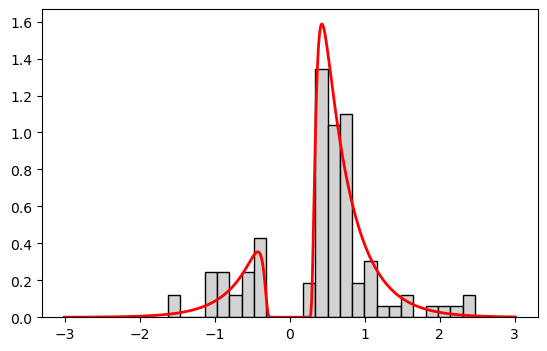

In [21]:
# plot data and model likelihood function
fig = pbp.plot_rt(model = model, # dictionary containing model information 
                    phi = phi,   # parameters used for model rt distribution
                 rt_max = 3.0,   # dictionary of simulated rt data
                     rt = rt);   # dictionary of simulated rt data
